In [49]:
from __future__ import print_function
from astropy.coordinates import SkyCoord
import astropy.units as units
from dustmaps.bayestar import BayestarQuery
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.mlab import griddata
import numpy as np
from scipy.stats import norm
import sfdmap

In [24]:
#fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]
#fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]
#fullmeasuredPeriod = [0.0048604046405053012, 0.0031756929885239709, 0.0030990293023665659, 0.054719630853603922, 0.027248137741863826, 0.022387402785647301, 0.083378308467595308, 0.023873319085618874, 0.16569719654631015, 0.023235637882944159, 0.73862659636580419, 4.5874246830046497, 2.1985371413213217, 1.3530200880071708, 0.54864680925572573, 11.288777451380563, 19.485444564839096, 33.601919211540995, 57.891585288813268, 13.035797366270113, 0.0064132092362571601, 0.0054856058204670634, 0.0094120477729785438, 0.01623775230227395, 0.028013550130180285, 0.050790741260795899, 0.047468962897049667, 0.021866054763031783, 0.24816183654208146, 0.42813081564778893, 0.73861232977373681, 1.2742335573022892, 2.1984416434039105, 3.7924316655485075, 6.5438292855892675, 11.290629154243234, 19.482356075788942, 33.579625361179986, 58.124279845241226, 99.84552012141485, 0.0031622776166488433, 0.0054555951902595587, 0.0094120481333351911, 0.016506532767412013, 0.028013563355334285, 0.048329325154835949, 0.083378457944775941, 0.14384527707776976, 0.24816376910377017, 0.42813411770242454, 0.73862088966284212, 1.2742543157114079, 2.1984079402373338, 0.78964125924253159, 6.542809177229123, 11.288110987025782, 19.482797228566245, 33.574384047858047, 58.045854755908856, 99.990562140628811, 0.0031622775004247405, 0.0054856045264290148, 0.0094120486996099768, 0.016237775438665492, 0.028013561531174368, 0.04832931972548845, 0.090985172556263677, 0.14384442336216402, 0.24816405541176545, 0.42812953744676585, 0.73862342596438302, 1.2743014964293806, 0.68604811493119577, 0.78961589569542412, 6.5437048651003114, 11.287222490288002, 19.476843351257774, 33.594047414373854, 57.94421797643983, 99.996372586916806, 0.0031622778781531056, 0.0054555946713738326, 0.0094120494718029791, 0.016237766551831803, 0.028013549674140714, 0.048329340085547859, 0.083378251908801854, 0.14384526505353593, 0.24816258809027267, 0.42813880457710485, 0.73862437708195161, 1.2742797928651857, 2.1983910890415568, 3.7927325770042843, 6.5437048651003114, 11.288851507833462, 19.469791614562574, 33.618330643295664, 57.994991836350813, 100.18266408521637, 0.003162277721250543, 0.0054555948270395413, 0.009412049265884832, 0.016237768543707475, 0.028013570651976318, 0.048329255930746676, 0.083378247868890962, 0.14384512076288691, 0.33037319360908141, 0.42813571548908264, 0.73860472114997844, 1.2742665823619828, 2.1983236868417193, 3.7928078123295936, 6.5438541702548294, 11.288333133066853, 19.471554069980417, 33.602575361161477, 57.870169744431131, 100.22934546589396, 0.0031622774713687156, 0.0054555950518900215, 0.0094120501410370136, 0.01623776946303487, 0.028013572020097126, 0.048329334656197008, 0.083378247868890962, 0.14384546946578425, 0.24816294597196364, 0.42813273296363413, 0.73862088966284212, 1.2742835673449824, 2.1983826635405435, 3.7928746906801516, 6.543207230454037, 11.294334382980184, 19.469791614562574, 33.609138267041885, 57.975452901872671, 100.06615065170551, 0.0031622777698262551, 0.0054555949444266881, 0.0094120493977488916, 0.016237767944886503, 0.028013571274939173, 0.048329300267769701, 0.083378272561594066, 0.14384506285655185, 0.24816286249381306, 0.42813228520303448, 0.73862393925554704, 1.2742866135891466, 2.1984559493481468, 3.7927097160757559, 6.5422053622625409, 11.287336315050338, 19.470033296099423, 33.611745817222932, 58.037590704310574, 100.29188616584749, 0.0031622775324612763, 0.0054555948582703916, 0.0094120488335998655, 0.01623776825017852, 0.028013563097033026, 0.048329265109553328, 0.083378192066733831, 0.14384453577988149, 0.24816054501555279, 0.42813026897197087, 0.73863278313425795, 1.2742988348087236, 2.1984503530967707, 3.7925514938537428, 6.5426761942805927, 11.288000186161856, 19.475082310623879, 33.605860344025935, 57.940250436740513, 100.11749286127444, 0.0031622776598278462, 0.0054555940828638462, 0.0094120481668783767, 0.016237773898082966, 0.028013565368673141, 0.048329285393133456, 0.083378171943043075, 0.14384497900318682, 0.24816250595587877, 0.42813419533419128, 0.73862583435458506, 1.2742922541228996, 2.1984447568738856, 3.792643094583747, 6.5428992436279714, 11.288590359378611, 19.474862733801899, 33.616979079842743, 58.008354299464649, 99.891686223234444, 0.0031622779145610157, 0.0054555950822767676, 0.0094120495003214479, 0.016237765197258835, 0.028013566277329295, 0.048329275927460606, 0.083378216215175577, 0.14384519462632298, 0.24816446692719532, 0.42813578712317529, 0.73861414806543257, 1.2742847334223255, 2.1983412318892848, 3.7927596837307651, 6.5429735967900591, 11.2893281626882, 19.475521479122392, 33.599976931580606, 57.975255295591388, 99.961056626060682, 0.003162277723511134, 0.0054555942207138832, 0.0094120488848861358, 0.016237765807842679, 0.028013578998521579, 0.048329259700601507, 0.083378308784331862, 0.14384487119186115, 0.24816257726338367, 0.4281304812059254, 0.73862741361121198, 1.2742969546058385, 2.1984223722672502, 3.7925015316841355, 6.5418832530824949, 11.287115042032228, 19.46125863407207, 33.597362742797692, 57.95969236013584, 100.16974713793468, 0.0031622775614082231, 0.0054555947721140986, 0.0094120494490351689, 0.016237766723718534, 0.028013551284510361, 0.048329319199138174, 0.08337822828940171, 0.14384515868908873, 0.24816268422471788, 0.42813026897197087, 0.73862457095414591, 1.2742696922874914, 2.1983692106533717, 3.7929345808921071, 6.5434941162453812, 11.288073954439213, 19.470911197515438, 33.619596322304403, 58.055146697333271, 100.03052344525933, 0.0031622778103519867, 0.0054856046400164294, 0.0094120506286197291, 0.016237765044612881, 0.028013572637923988, 0.048329325960344782, 0.083378453675597833, 0.14384529045903544, 0.24816243464841486, 0.4281329219115263, 0.73861762232898587, 1.2742584116693842, 2.1983216471781635, 3.7929095945957862, 6.5435932721983256, 11.291615965968475, 19.471789178103958, 33.597362742797692, 57.926648849214232, 100.22205598917985, 0.0031622776771960152, 0.0054555948927329104, 0.0094120507311923132, 0.016237772066329745, 0.028013564005689027, 0.048329278631938186, 0.083378240363631326, 0.143844990982233, 0.2481636825349498, 0.4281370605628847, 0.73862267586159092, 1.2742565315857839, 2.1983664127449147, 3.7930428586470413, 6.5424531601403286, 11.289401948323567, 19.467619475351189, 33.599323346246557, 57.942194042118757, 99.851264600743804, 0.0031622776714066254, 0.0054555944619514634, 0.0094120491926037823, 0.016237772218975828, 0.028013560825393281, 0.048329347596218673, 0.083378340982347449, 0.14384503889843758, 0.24816065197513512, 0.42813599936260072, 0.73861288470497122, 1.2742631119026564, 2.1983356362219277, 3.7927097160757559, 6.5423788188059975, 11.287926418848654, 19.478376557222852, 33.605860344025935, 57.885882375662597, 100.12329619962895, 0.0031622775671976125, 0.005455595719833479, 0.0094120473975844669, 0.016237770997807221, 0.028013560371065373, 0.048329359766406246, 0.090985488784698559, 0.14384513473094254, 0.24816075893480963, 0.42813674220224718, 0.73862678190775088, 1.2742527714352274, 2.1984055841114167, 3.7927180439268278, 6.5428001087071701, 11.291394525126625, 19.483869445488299, 33.580380426080744, 58.014199223744704, 99.689904717975111, 0.0031622777003535748, 0.0054555942896389034, 0.0094120495003214479, 0.016237767639594492, 0.028013567185985501, 0.048329278631938186, 0.083378163893569487, 0.14384478733871961, 0.24816236334099195, 0.42812984450469305, 0.73862520265382536, 1.2742678121706035, 2.1984195742234718, 3.792534839650942, 6.5424779409605494, 11.287188798740978, 19.474204033043062, 33.615670611417691, 57.957747580677456, 100.24532190764553, 0.0031622774340416613, 0.0054555950133517274, 0.0094120502183294152, 0.01623776825017852, 0.028013578998521579, 0.048329298915529659, 0.083378481848958033, 0.14384501494033128, 0.24816268422471788, 0.42812899557266254, 0.73861762232898587, 1.2743157568843724, 2.1983971901296515, 3.7922184375861185, 6.5436180616561099, 11.291468337775527, 19.475960667428094, 33.626141211747935, 57.998615375782883, 100.23368759831033, 0.0031622777582474746, 0.0054555949099641694, 0.0094120496541802885, 0.016237764739320981, 0.028013580361507154, 0.048329271870744817, 0.083378248413119679, 0.14384525452175329, 0.24816361122680972, 0.42812984450469305, 0.73861635895663935, 1.274288493761516, 2.1984755364523307, 3.7931428128310825, 6.5431718801508989, 11.287410074650984, 19.470472236911537, 33.605206529786294, 57.951914025285028, 99.98998940526171]
#fullSigLevel = [0.7726, 0.47040000000000004, 0.23929999999999996, 0.847, 0.37170000000000003, 0.9147, 0.21550000000000002, 0.782, 0.7906, 0.11339999999999995, 0.987, 1.0, 0.9809, 0.6752, 0.4337, 0.7887, 0.6273, 0.03069999999999995, 0.7859, 0.7062999999999999, 0.7183999999999999, 1.0, 0.999, 0.4021, 0.9998, 0.9705, 0.04259999999999997, 0.6950000000000001, 0.507, 0.9716, 0.16349999999999998, 0.9996, 0.7327, 0.19579999999999997, 1.0, 1.0, 0.7038, 0.9702, 0.4426, 1.0, 0.513, 1.0, 1.0, 0.9982, 1.0, 0.9476, 0.9917, 1.0, 0.9437, 1.0, 0.9939, 1.0, 0.999, 0.9999, 0.9998, 0.9998, 0.9928, 1.0, 1.0, 1.0, 0.6998, 1.0, 1.0, 1.0, 1.0, 0.9996, 1.0, 1.0, 0.9975, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9913, 1.0, 1.0, 1.0, 1.0, 0.6255, 1.0, 1.0, 1.0, 1.0, 0.9999, 0.9994, 1.0, 0.9998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9981, 1.0, 1.0, 1.0, 0.5812999999999999, 1.0, 1.0, 1.0, 1.0, 0.9999, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9998, 1.0, 1.0, 1.0, 1.0, 0.7514000000000001, 1.0, 1.0, 1.0, 1.0, 0.9779, 1.0, 1.0, 0.9732, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 0.37460000000000004, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9989, 1.0, 0.9558, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5166, 1.0, 0.9919, 1.0, 1.0, 1.0, 0.9866, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 0.8513999999999999, 0.9993, 1.0, 1.0, 1.0, 0.27580000000000005, 1.0, 1.0, 0.9998, 1.0, 0.9999, 1.0, 1.0, 0.9932, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6466000000000001, 1.0, 1.0, 0.9998, 1.0, 0.9959, 1.0, 1.0, 0.999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9991, 1.0, 1.0, 1.0, 1.0, 0.5131, 1.0, 1.0, 1.0, 1.0, 0.9918, 0.9993, 1.0, 0.9561, 1.0, 1.0, 1.0, 0.9997, 1.0, 1.0, 0.998, 0.9974, 1.0, 1.0, 1.0, 0.7424999999999999, 1.0, 1.0, 1.0, 1.0, 0.9969, 1.0, 1.0, 0.9974, 1.0, 0.9996, 1.0, 1.0, 1.0, 1.0, 0.9974, 0.9975, 1.0, 1.0, 1.0, 0.5097, 1.0, 1.0, 1.0, 1.0, 0.9762, 0.9996, 1.0, 0.9999, 1.0, 1.0, 1.0, 0.9999, 0.7389, 1.0, 0.9997, 1.0, 1.0, 1.0, 1.0, 0.06299999999999994, 1.0, 1.0, 1.0, 1.0, 0.8449, 0.9689, 1.0, 0.9993, 1.0, 0.9656, 1.0, 1.0, 0.9996, 1.0, 0.9924, 1.0, 1.0, 1.0, 1.0, 0.08560000000000001, 1.0, 1.0, 1.0, 1.0, 0.9994, 0.9958, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8662, 0.9995, 1.0, 1.0, 1.0, 0.21330000000000005, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 1.0, 0.9999, 0.9987, 1.0, 1.0, 1.0, 1.0, 0.48819999999999997, 1.0, 1.0, 1.0, 1.0, 0.9997, 0.9892, 1.0, 0.4113, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995, 1.0, 1.0, 1.0, 0.09850000000000003, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999, 1.0, 0.997, 1.0, 1.0, 1.0, 0.9998, 1.0, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0, 0.18059999999999998, 1.0, 1.0, 1.0, 1.0, 0.9991, 0.9997, 1.0, 0.9325, 1.0, 0.9999, 1.0, 1.0, 0.9977, 0.9997, 0.9967, 0.9998, 1.0, 1.0, 1.0]

In [25]:
# [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0],
#  periodlist 
#  measuredperiodlist 
#  siglist 
#  powerlist 
# [0.31827018548761699, 0.26832990806835494, 0.26651862343207849, 0.21875619253879669, 0.25811965122674108, 0.24861819719491302, 0.23498295443685571, 0.22716191814028425, 0.21917502202999811, 0.26100143870684822, 0.2330238066211725, 0.24561812788350204, 0.1978808263841409, 0.28668248456859124, 0.22038764064204275, 0.31841549006137926, 0.24239097133234788, 0.23422439746961854, 0.21747725691675607, 0.19424989693218936, 0.31548339095775824, 0.26483592497910824, 0.26937502828531212, 0.22174135143190871, 0.25705806072044829, 0.24873712194964248, 0.23669613107371068, 0.22955017803872951, 0.22110080779213984, 0.25972307116210014, 0.23373294339408035, 0.24529841223932297, 0.1961056389138979, 0.28634696690428418, 0.22009587090863481, 0.31973766911706836, 0.24247470162092605, 0.23286585785072486, 0.21802928297167545, 0.19576680752809872, 0.31718918478037256, 0.2702176347527292, 0.26481117353182082, 0.22045728001628867, 0.25922176407521863, 0.24975186170755531, 0.23067036125342938, 0.22510595243557097, 0.21885116641512384, 0.25877583808565569, 0.23367168852637826, 0.24560604158689142, 0.19675844740957724, 0.28889976816341922, 0.21758800168453146, 0.31974336450343099, 0.24250426054378582, 0.23129945161919019, 0.21517165027965196, 0.19450328197240319, 0.31473500158220247, 0.26560695200691642, 0.26638595106183111, 0.21946890794765922, 0.25744812866051386, 0.24738166165910963, 0.23602494109596778, 0.23094104776975233, 0.22349018128695486, 0.26028970042177435, 0.23517476835010284, 0.24548905670706467, 0.19744046158863671, 0.28782213883465702, 0.22206254962948424, 0.31423621711527833, 0.24442765062906438, 0.23422705635492985, 0.21518940256816069, 0.19105277988609898, 0.31677230898992537, 0.26432802367054059, 0.26558784870295887, 0.22105192855792077, 0.25880683940612281, 0.24353709586746111, 0.23196712366282135, 0.23001108151744915, 0.22089855981841053, 0.25911272549513004, 0.23420098907546427, 0.24623161219380038, 0.1956004264381756, 0.28858613987785281, 0.2245359391601025, 0.32056789224439453, 0.24416425704082606, 0.23775739483673292, 0.21600735396245763, 0.19377663325296987, 0.31517877380620385, 0.26698038272394697, 0.26715882140171149, 0.21854455939119657, 0.25475852796548748, 0.25077685036326247, 0.23137411778217401, 0.2264796349136653, 0.21814035906842866, 0.25769917403179926, 0.23807892310726864, 0.24809791180578494, 0.2033381802405724, 0.28075908279670203, 0.22295207030436975, 0.31871419929382838, 0.24108391916867739, 0.23411815891722693, 0.2118678614306832, 0.19225666167039862, 0.31940221656077911, 0.25932558729333122, 0.26472819050632412, 0.21869978291944653, 0.25789624310611137, 0.24884733481169433, 0.24319474177233857, 0.22809297002328427, 0.22554219780472987, 0.26813860152688168, 0.23153743401622001, 0.25104911143564623, 0.19853658913041555, 0.28607471817783503, 0.22128928438837986, 0.31936289010828633, 0.24885288551414839, 0.23181744170024493, 0.21416991986604364, 0.1980944330781968, 0.31623571690366908, 0.27321182085076057, 0.26212709945501406, 0.22187197657571822, 0.25608756122223419, 0.24745647733861925, 0.23737713493211582, 0.23092029482694959, 0.21839300601304484, 0.26428281641641665, 0.23105356923881532, 0.24050290742574443, 0.20445648523639279, 0.29023327753690892, 0.2190714447909527, 0.30531511267261291, 0.24433044803250473, 0.23622385357996148, 0.22046673774122957, 0.19330911307389917, 0.31370807926280464, 0.26251746139609744, 0.26403593560519617, 0.22085096619127412, 0.25916306637464476, 0.25020519187866996, 0.2323044212852286, 0.22948141085332957, 0.21264519712231722, 0.25870938702325297, 0.22885679481893884, 0.25378258880980248, 0.1981119004224092, 0.28417480427491909, 0.22334271294530095, 0.3145605459597795, 0.24338261727871977, 0.23244717603492421, 0.21313155997394023, 0.18902714611242649, 0.31884780700620829, 0.26687887075629435, 0.26658880389532502, 0.22468980170868075, 0.25368984532657463, 0.25281749326551683, 0.2324851231313908, 0.23225886903608581, 0.21291812017670231, 0.26091750671221453, 0.23177794628266152, 0.2462128133418186, 0.19426737575846303, 0.28374760464426851, 0.2253043513578315, 0.31572234605118304, 0.237925753097329, 0.23658285539343554, 0.20724894906184604, 0.19719700660627262, 0.3142871407461843, 0.25863154895702406, 0.26629080654301879, 0.2299422298709915, 0.25472551928603454, 0.25009662737242871, 0.23531272538522224, 0.22802528704191749, 0.22289172585307793, 0.25306492691012261, 0.24649293823919283, 0.23563862765553253, 0.19526749259399759, 0.28297613493877416, 0.21770192013758249, 0.31681448040399979, 0.23213244892595472, 0.2229664338982259, 0.20966838199395485, 0.19313301260180923, 0.30515030950706024, 0.28119506987882775, 0.26704255430763363, 0.22727561432383275, 0.26562230635838091, 0.24836900028284148, 0.2287708448344849, 0.23083687148462012, 0.20851162012610031, 0.23596013315699693, 0.21269448318806405, 0.22838987057897323, 0.21308185690936737, 0.28056582369223915, 0.21887699969198393, 0.30632130733210555, 0.23289718481755387, 0.22222657949965335, 0.223290383813537, 0.1934041516339858, 0.30451726105449967, 0.25224466085338915, 0.27666497893700265, 0.22302041943352441, 0.24976463802215221, 0.25529397677833654, 0.23017335465182581, 0.22085630799235526, 0.20578143342501462, 0.25683905596581136, 0.22536263912870372, 0.25462201372647331, 0.1827604497131865, 0.26648074528013516, 0.21352584817808307, 0.27993956110257429, 0.26171366448458322, 0.2268040678685054, 0.21962285600258707, 0.19207696355692716, 0.29560729097581301, 0.25097658677687851, 0.23139001412340895, 0.22582055562213005, 0.23623787616180902, 0.25508877438070354, 0.23682527756056607, 0.23279219722195654, 0.24411303729390998, 0.22821651381151783, 0.21626008781504097, 0.21718296587866565, 0.19935520858425954, 0.27014012362927209, 0.20522615632121896, 0.2475229187857993, 0.20122350326432767, 0.20316563122932557, 0.21397808973152987, 0.21343503416418774, 0.25479018235832951, 0.2480228841411613, 0.24027803659657374, 0.23455098319204307, 0.23264981499246584, 0.25731318332021824, 0.22357514193188813, 0.21300973433704348, 0.21942763695757922, 0.23447696478357005, 0.18066177772092296, 0.22021944119798528, 0.19269609441594471, 0.22247876676617451, 0.20749608003127176, 0.31875454677728671, 0.21847659771337663, 0.22965055196654546, 0.20039316357661885, 0.21769014624557442, 0.26069242654177943, 0.26009858920750817, 0.24009840022899345, 0.21332496827181244, 0.23587039633729362, 0.22527843995383451, 0.22035875966874061, 0.24379813102949166, 0.23816343833636794, 0.224232314842153, 0.19914739234728857, 0.23169754970381806, 0.26328384649263403, 0.24565379502428733, 0.1939652676709944, 0.27649067918191667, 0.2250503228231934, 0.23923633187255022, 0.23576810223249556, 0.19263504783127822, 0.27616435851433868, 0.2632169550652278, 0.24702231705776098, 0.21867288308335853, 0.23990323317405238, 0.23806657513777435, 0.22064921031072099, 0.23062504701859129, 0.23761955296401996, 0.22809970536146396, 0.21393785433932327, 0.25313055446407201, 0.22329099734759933, 0.23122085571455733, 0.20459449765102228, 0.22605025125597994, 0.21380557493826266, 0.2007210460244345, 0.20422311124444262, 0.24205305857344539, 0.25525040382733843, 0.24651335909467015, 0.28391754608375031, 0.22168345704567222, 0.28216075548944308, 0.24106263092241986, 0.26474507987822449, 0.23728676142798627, 0.23639686519244693, 0.29375104229243498, 0.19750775225785577, 0.19196834672579177, 0.2023129645665053, 0.20484467590952204, 0.24492882855528986, 0.21641462134882677, 0.20851934437610964, 0.24921562178429929, 0.16482379369959055, 0.23939553499949512, 0.28312000481097038, 0.28904778292412736, 0.27302107895447597, 0.28449942805801587, 0.26612795422201457, 0.26289836779702414, 0.22537730778174109, 0.25319911788557486, 0.23809555058753995, 0.28050256216876251, 0.21634557882294492, 0.20590736669503934, 0.22658227746588783, 0.18898193581802042, 0.23601210073725937, 0.18673879949900873, 0.20439925616523252, 0.21196641868817073, 0.22618105724320758, 0.20662831351796809, 0.3003497526566607, 0.2619898253221995, 0.38201785406076166, 0.25972965629123423, 0.27171533689086941, 0.26148552816369264, 0.24367352156666344, 0.26153416736113722, 0.29121874265197639, 0.27032184547507715, 0.27116261446210149, 0.22823821232682606, 0.2197587819444391, 0.26515110162414718, 0.23532861587936443, 0.18819629263826151, 0.20913690915376146, 0.23095387715253535, 0.22222320988654898, 0.20810932035747851],
#  listnumberlist 
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399]

In [26]:
fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.57894736842105, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.31578947368421, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 23.63157894736842, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]


In [27]:
fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0, 0.00316227766016838, 0.00545559478116852, 0.00941204967268067, 0.016237767391887217, 0.02801356761198867, 0.04832930238571752, 0.08337822234717891, 0.14384498882876623, 0.24816289228368255, 0.4281332398719392, 0.7386199822079358, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.543189129712962, 11.288378916846883, 19.47483039908755, 33.59818286283781, 57.963939533849604, 100.0]

In [28]:
fullmeasuredPeriod = [0.0059660977647571127, 0.003185119778327868, 0.0070667003011562783, 0.015014305036765653, 0.031345997206578262, 0.045543124761958285, 0.020202385222514375, 0.025155958396862774, 0.019195932755806232, 0.052341006902967377, 1.3842070562721489, 0.99868178865244794, 0.99868178865244794, 0.99868178865244794, 0.99868178865244794, 27.260867907153091, 10.818770105384967, 20.666556483730862, 18.549965156884372, 13.639749086062375, 0.0029669386080460555, 0.003759887553072265, 0.0095014584432782188, 0.017785446228626722, 0.028703105374971991, 0.048329716924497335, 0.075977577380554565, 0.14385976833170722, 0.017785399131190788, 0.42797276649954641, 1.1294319881391717, 1.2666536046102779, 4.1835534665826462, 0.5162042924353446, 1.0297117443489008, 11.382478625366252, 19.414330539094575, 84.479982798446784, 23.199560428500892, 18.573216232841329, 0.0031622934621001169, 0.0029393306357378252, 0.0055978166125212319, 0.016231575432687981, 0.026944170119181876, 0.063880759397090661, 0.065575294403374632, 0.016231525791651064, 0.16990963552104174, 0.068082856594289712, 0.51576730514285218, 1.2730593743504242, 1.2338807970208057, 0.81130090812373723, 0.72941107555682794, 12.876138105706186, 37.47511219133694, 34.505707874048653, 18.593878004737359, 100.6158997615232, 0.0048315977833625475, 0.0052330283429673262, 0.0082349437070672136, 0.015978436608810872, 0.028012841491895236, 0.068678255152614276, 0.1106017231380803, 0.11709573402739254, 0.10753356410374956, 0.073838595158508269, 1.5542598891408645, 0.99873708050233467, 1.3879619621050723, 3.9017635839766278, 0.54001962023437355, 11.097523422339314, 18.773280410949077, 30.655108094068282, 11.011220910103402, 89.490559360925928, 0.0031622558126739356, 0.0054555802043408479, 0.007325010227215969, 0.016505698628995209, 0.020084260878715551, 0.050389582909995956, 0.083376337070107664, 0.020084460302040134, 0.020084246634343907, 0.42791597497560763, 0.73772941427516203, 6.9100024424726731, 1.5678271949766069, 0.52578531504163117, 2.4632152118168413, 11.196983007583677, 19.434656356607295, 35.571079035238178, 51.791807104295863, 74.305672414746041, 0.0067643876120171698, 0.0034064486056333641, 0.009019585636502429, 0.016506093080806111, 0.028013691309985253, 0.048333448145849542, 0.083375682459796208, 0.015279665665990106, 0.26335461944477895, 0.42824600533548796, 1.089817290724344, 0.59122832584199436, 0.6909641232778031, 3.8121222374104247, 6.6275326533514507, 11.35107708914124, 19.488154593523749, 35.690629667764036, 27.96121252828803, 90.636259817302303, 0.0031572720517946302, 0.0056944806941254212, 0.0094119026267824573, 0.016237889393733947, 0.028012656755654803, 0.048328663911355381, 0.10100171231034519, 0.042700948536997546, 0.24817362166558476, 0.42813162347940825, 1.4669049912900876, 1.2750943043944425, 0.76429721522019145, 0.80564701088444612, 6.4661132263563523, 11.253343767925042, 20.091928410293797, 34.045780834259617, 55.261845798707839, 88.83551228027477, 0.00316226946681877, 0.007061145733224722, 0.007785841791743036, 0.01623779007821382, 0.028013654360300483, 0.04609532878996216, 0.08336872785999545, 0.14380321815635047, 0.025052203104941485, 0.14035685879853485, 0.7387558426581263, 1.272058615961929, 0.651778383429901, 0.5893130610647541, 6.562514220666247, 28.601333169975707, 28.601333169975707, 30.96799297994323, 28.601333169975707, 126.36128287115255, 0.0031622742928809223, 0.011440282474812448, 0.009412102832261762, 0.016237402138604674, 0.028013700547421676, 0.03886185034782243, 0.0386409895600151, 0.14378009742189987, 0.011169777068798445, 0.011169954770641415, 0.7400686886055731, 0.7424877314255838, 1.5833136372137526, 3.801205852937772, 1.1796939705820222, 11.176360565111066, 18.629197326811358, 34.77036107231504, 64.88494118604245, 89.30241938462447, 0.00316226805431556, 0.0032095561731780658, 0.009412191467615868, 0.01629179467357039, 0.0280131924974649, 0.04436402863434174, 0.0833751915088082, 0.011346778660158284, 0.011346936274299514, 0.015583498542643527, 2.841924096556608, 1.274520424510509, 7.317085545980546, 3.7859600407194374, 6.4391578309638575, 20.871848793103617, 20.035068738751235, 32.89875638591376, 18.588436063406522, 20.37624913496608, 0.0031622667595220598, 0.0054556208443461386, 0.0032005177458765285, 0.018630944927821698, 0.028012610571975408, 0.048333943120722242, 0.042775985217268657, 0.12575557859832476, 0.027624738547039739, 0.42840581058246652, 0.73826793327768725, 1.2747881708251643, 0.70723698950138902, 3.808704137970305, 6.6105145278630824, 11.543878169229938, 19.609609219547902, 34.558201692900404, 62.544281657886984, 60.067838949092362, 0.004370645211468219, 0.003909542808471668, 0.009412017326796291, 0.010852116695315033, 0.023993763198254515, 0.04532844697807267, 0.3002697999399257, 0.4703131050997269, 0.14197675845064509, 0.023136519199859252, 0.9387975202168144, 0.7826029751038981, 2.8043989068403787, 0.7950091433263567, 4.724843176150296, 11.526649245858893, 19.17583870798745, 31.862310401312183, 49.26877511126514, 101.58215861563293, 0.0031622968931728696, 0.005455574949211958, 0.005025410706271051, 0.013638010076532897, 0.010250638699471851, 0.05078575614198343, 0.03367152496736506, 0.011475064697873426, 0.24820842525341846, 0.4278276218701436, 0.7374988608407544, 1.275132581429148, 0.791845038667649, 3.7974677710708353, 0.8651802206056453, 11.169013804683761, 33.35078320724669, 40.995177071749495, 57.04290730672674, 79.37361430957014, 0.0031622672303559373, 0.007794862171822597, 0.006662685798600846, 0.01623778697462339, 0.02801019999534142, 0.04832880137614097, 0.08338713962448821, 0.05982254409949473, 0.06362327019025188, 0.030267710285746402, 1.8023584432306181, 1.2748455596718336, 1.8286620284741488, 3.8037587673578606, 0.8653388471742498, 10.84119749170587, 19.89431764411907, 36.19238968422933, 12.81505416295466, 91.4164979727431, 0.003271737236235225, 0.003164517533490061, 0.006290993086312506, 0.029560120333447668, 0.027200656735089253, 0.04609392823773938, 0.08249883046964591, 0.1438292683103883, 0.013877859405392432, 0.012974242282201532, 0.7572867210060106, 4.647049933478963, 0.9091889880252073, 3.7810735195186425, 0.8651802206056453, 10.996967490889615, 19.141274560504613, 33.052350196330956, 54.10052697980904, 27.96121252828803, 0.0031350580840013953, 0.0033039285977712577, 0.005112572109105451, 0.016815699145621196, 0.028821153764069508, 0.016147108880799912, 0.02310712501477645, 0.023646242458065077, 0.24792414196736384, 0.023654896148679463, 1.000479318877846, 1.000479318877846, 0.7071251318521609, 3.766135934716621, 0.9998955138314009, 11.420035066317238, 20.1772228115188, 34.210733291203965, 56.605732972236034, 57.45793416097345, 0.0031622690109846486, 0.004327100115640872, 0.009412156630438977, 0.016243540872773212, 0.0847601235475461, 0.017367079452057854, 0.05872723359707652, 0.16807728496448654, 0.08476183486647995, 0.07469176473024262, 3.095162570095281, 0.9949074908512225, 1.686206773490372, 0.5468039601838952, 0.9948957020597782, 11.157498732689307, 32.12926712461492, 33.59476893114572, 56.18904231537197, 101.12374703743265, 0.003162260197712871, 0.005455531225220453, 0.008050397160374723, 0.01623822556198149, 0.028013630008158673, 0.023358142026138225, 0.07694987772339329, 0.11808120979024182, 0.0900262751034536, 0.42780628131793746, 0.7366108159059033, 1.244635908097482, 1.389381229750722, 3.7493185923349435, 6.511652737558181, 11.563153024610942, 27.753755669399016, 32.5149718186352, 52.50003472388241, 27.753755669399016, 0.0031577580451864888, 0.00524210109968917, 0.008336030286211452, 0.014584439053408187, 0.027248222737961, 0.025925901673190088, 0.07347949800174974, 0.12570049363548813, 0.1291836030609247, 0.11457687084804469, 0.7385026455549452, 1.274911590208295, 0.6785190616577607, 3.80177594536611, 1.175641819280405, 11.135303015933953, 19.251939147087818, 31.54977524366486, 57.34021704222936, 103.36456390286149, 0.006646031445852991, 0.007989791992008383, 0.004079592929293399, 0.023513089828634277, 0.040144126000414594, 0.011517059572555142, 0.01064235724821447, 0.14381551143559107, 0.17433487098652412, 0.4282404884855325, 3.0866288544182443, 1.2770834230134824, 2.3016738250778563, 3.7831048231988045, 1.3521934455222224, 11.27435776619183, 18.82040761553711, 35.053395499102976, 54.867210975358674, 87.34330634498157]


In [29]:
fullSigLevel = [0.05169999999999997, 0.254, 0.36639999999999995, 0.0534, 0.05249999999999999, 0.06689999999999996, 0.07830000000000004, 0.5959, 9.999999999998899e-05, 0.3478, 0.5438000000000001, 0.45809999999999995, 0.1854, 0.6868000000000001, 0.008000000000000007, 0.18600000000000005, 0.41590000000000005, 0.008399999999999963, 0.07879999999999998, 0.6208, 0.07730000000000004, 0.4333, 0.9557, 0.9348, 0.8145, 0.9997, 0.403, 0.21919999999999995, 0.29479999999999995, 0.6706, 0.15269999999999995, 0.6019, 0.15610000000000002, 0.3506, 0.8846, 0.7661, 0.8233, 0.1945, 0.07040000000000002, 0.38959999999999995, 0.3517, 0.4911, 0.055400000000000005, 0.892, 0.9821, 0.26570000000000005, 0.0776, 0.2522, 0.3811, 0.8899, 0.9921, 0.9981, 0.6335999999999999, 0.9479, 0.9984, 0.9826, 0.7809, 0.9764, 0.5023, 0.4838, 0.008399999999999963, 0.18000000000000005, 0.07840000000000003, 0.53, 0.9959, 0.9201, 0.893, 0.961, 0.7299, 0.9501, 0.7038, 0.9496, 0.8742, 0.8803, 0.7761, 0.9999, 0.9605, 0.5369999999999999, 0.9593, 0.9897, 0.6403, 0.9368, 0.41969999999999996, 0.16749999999999998, 0.0016000000000000458, 0.00039999999999995595, 0.48219999999999996, 0.046499999999999986, 0.0, 0.00880000000000003, 0.6173, 0.00990000000000002, 0.006099999999999994, 0.0, 0.01319999999999999, 0.056499999999999995, 0.027800000000000047, 0.6334, 0.07330000000000003, 0.019100000000000006, 0.5521, 0.6312, 0.2935, 0.4406, 0.5765, 0.9805, 0.9999, 0.1331, 0.683, 0.8174, 0.9643, 0.9942, 0.9893, 1.0, 0.9999, 1.0, 0.9976, 1.0, 0.9995, 0.9985, 0.24550000000000005, 0.9968, 0.9629, 0.8741, 0.14570000000000005, 0.9999, 0.12819999999999998, 0.991, 0.9390000000000001, 0.4145, 0.7389, 0.9699, 0.5521, 0.24460000000000004, 0.9945, 1.0, 0.7293000000000001, 0.6134, 0.4596, 0.18789999999999996, 0.1522, 0.3498, 0.41290000000000004, 0.9905, 0.9979, 0.9953, 0.9974, 0.7335, 0.1784, 0.908, 1.0, 0.9768, 0.8104, 0.98, 0.9993, 0.969, 0.9957, 1.0, 0.9442, 0.9854, 0.4877, 0.21850000000000003, 0.9605, 0.9898, 0.9823, 0.6676, 0.8533999999999999, 0.6004, 0.45230000000000004, 0.9635, 0.9982, 0.9635, 0.9657, 0.9999, 0.9999, 0.9926, 0.9628, 0.9995, 0.9978, 0.8152, 0.11639999999999995, 0.10150000000000003, 0.18569999999999998, 0.6105, 0.5512, 0.8899, 0.2563, 0.9252, 0.5022, 0.6162000000000001, 0.9868, 0.25849999999999995, 0.014100000000000001, 0.9872, 0.6859, 0.8519, 0.9985, 0.9984, 0.12990000000000002, 0.07550000000000001, 0.01759999999999995, 0.9896, 0.11080000000000001, 0.3722, 0.9989, 0.7672, 0.23440000000000005, 0.9949, 0.00539999999999996, 0.9858, 0.9999, 0.7488, 0.7021999999999999, 0.9865, 0.9998, 0.8804, 0.8093, 1.0, 0.9325, 0.35619999999999996, 0.2388, 0.0019000000000000128, 0.9004, 0.503, 0.014000000000000012, 0.010199999999999987, 0.06369999999999998, 0.36950000000000005, 0.9699, 0.18679999999999997, 0.9468, 0.8092, 0.8063, 0.9862, 0.8858, 0.9886, 0.9975, 0.9876, 0.944, 0.7819, 0.07679999999999998, 1.0, 0.8748, 0.6263000000000001, 0.5208999999999999, 0.13829999999999998, 0.43410000000000004, 0.14680000000000004, 0.7355, 0.9462, 0.9739, 1.0, 0.0030000000000000027, 0.9991, 0.9926, 1.0, 0.5302, 0.9505, 0.20820000000000005, 0.10709999999999997, 0.42410000000000003, 0.5765, 0.028100000000000014, 0.7764, 0.7848999999999999, 0.9878, 0.997, 0.8215, 0.2681, 0.7567, 0.987, 0.9864, 0.04269999999999996, 0.9999, 0.9657, 0.4255, 0.01419999999999999, 0.998, 0.9833, 0.5881000000000001, 0.5144, 0.2096, 0.3518, 0.6867, 0.02739999999999998, 0.6112, 0.6764, 0.8638, 0.48240000000000005, 0.029299999999999993, 0.9972, 0.9336, 0.10619999999999996, 0.9737, 0.527, 0.5505, 0.46199999999999997, 0.9392, 0.5003, 0.9561, 0.47650000000000003, 0.7179, 0.22330000000000005, 0.29490000000000005, 0.6451, 0.40359999999999996, 0.7577, 0.6538999999999999, 0.8264, 0.7234, 1.0, 0.03290000000000004, 0.0036000000000000476, 0.9911, 0.18130000000000002, 0.8825000000000001, 0.5299, 0.737, 0.7009000000000001, 0.17969999999999997, 0.24360000000000004, 0.8359, 0.9489, 0.6249, 0.6700999999999999, 0.5591999999999999, 0.7749, 0.9038, 0.14980000000000004, 0.6391, 0.9701, 0.5676, 0.38160000000000005, 0.9655, 0.9989, 0.4619, 0.3064, 0.8366, 0.7908999999999999, 0.8172, 0.35609999999999997, 0.6103000000000001, 0.9238999999999999, 0.9989, 0.9748, 0.12119999999999997, 0.48719999999999997, 0.22909999999999997, 0.6928000000000001, 0.9999, 0.9992, 0.9992, 0.9742999999999999, 1.0, 0.998, 0.9994, 0.9947, 0.9999, 0.8608, 0.25139999999999996, 0.49150000000000005, 0.21950000000000003, 0.8976999999999999, 0.3238, 0.8677, 0.2865, 0.06659999999999999, 0.9884, 0.815, 0.02510000000000001, 0.9994, 0.9877, 0.7517, 0.9786, 0.9962, 0.7854, 0.9652000000000001, 0.7968, 0.5962000000000001, 0.9761, 0.22809999999999997, 0.10229999999999995, 0.35829999999999995, 0.0013999999999999568, 0.1906, 0.36639999999999995, 0.02070000000000005, 0.48760000000000003, 0.8616, 0.49560000000000004, 0.8631, 0.7021, 0.31299999999999994, 0.9727, 0.7131000000000001, 0.7706, 0.16010000000000002, 0.5699000000000001, 0.5352, 0.8238]


In [30]:
#fullMag = [17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.368421052631579, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 17.736842105263158, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.105263157894736, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.473684210526315, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 18.842105263157894, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.210526315789473, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.578947368421051, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 19.94736842105263, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.315789473684209, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 20.684210526315788, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.05263157894737, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.421052631578945, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 21.789473684210527, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.157894736842106, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.526315789473685, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 22.894736842105264, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.263157894736842, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 23.631578947368421, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0]

In [31]:
#fullPeriod = [0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0, 0.0031622776601683798, 0.0054555947811685199, 0.0094120496726806703, 0.016237767391887217, 0.028013567611988671, 0.048329302385717518, 0.083378222347178912, 0.14384498882876623, 0.24816289228368255, 0.42813323987193919, 0.73861998220793579, 1.2742749857031335, 2.1983926488622894, 3.7926901907322494, 6.5431891297129621, 11.288378916846883, 19.474830399087551, 33.59818286283781, 57.963939533849604, 100.0]

In [32]:
#fullmeasuredPeriod = [0.0083803624797832692, 0.0054658475083939149, 0.0083908038073271119, 0.090251134891921825, 0.02801300041380175, 0.016610751002255845, 0.17702223333106121, 0.1770288446996342, 0.064839712385824422, 0.42822350277683097, 0.60377744852870574, 1.2735903819748613, 2.194340007195748, 3.7757340211526924, 6.4798471931086148, 11.265444135460131, 26.884087490625308, 33.608709456979255, 51.316226537252305, 26.884087490625308, 0.0083803591872327939, 0.0054658475083939149, 0.008390805457708159, 0.090250466629283307, 0.028013028006104786, 0.016610763937835036, 0.17702223333106121, 0.17702994664240873, 0.064839170362185658, 0.42822350277683097, 0.60389710739444458, 1.2736093933283672, 2.194340007195748, 3.7759011182936102, 6.4783711506238273, 11.265444135460131, 26.884087490625308, 33.608709456979255, 51.347109412487818, 26.884087490625308, 0.0083803591872327939, 0.0054658482087067512, 0.0083908005065669658, 0.090248652823434472, 0.028012972821553066, 0.016610757470042922, 0.17702223333106121, 0.17703215056911359, 0.064839515285270918, 0.42821490592810135, 0.60377317587479873, 1.2736284052494606, 2.1942835728250816, 3.7753998712348102, 6.4783711506238273, 11.265444135460131, 26.884087490625308, 33.582252574459737, 51.039943373673033, 26.884087490625308, 0.0083803608335077089, 0.0054658475083939149, 0.0083908021569467153, 0.090250275698918553, 0.028013028006104786, 0.016610744534473806, 0.17702223333106121, 0.17702994664240873, 0.06483902253912964, 0.42822135353228802, 0.60379026685326398, 1.2735333513196141, 2.194340007195748, 3.7762353569492166, 6.4798471931086148, 11.265444135460131, 26.884087490625308, 33.608709456979255, 51.471013525960693, 26.884087490625308, 0.0083803616566454076, 0.0059478569735780642, 0.008390805457708159, 0.090250180234039121, 0.028013028006104786, 0.015666219490868313, 0.17702223333106121, 0.14382793844592556, 0.064839515285270918, 0.42822135353228802, 0.60390565627118942, 1.2735903819748613, 2.1940578643671844, 3.7767368258965166, 6.4798471931086148, 11.265444135460131, 26.884087490625308, 33.621953536911505, 51.471013525960693, 26.884087490625308, 0.0083803624797832692, 0.0054658475083939149, 0.0083908005065669658, 0.090250657560455916, 0.028013037203551212, 0.016610825382111331, 0.17702223333106121, 0.14382502902883801, 0.064839958763201436, 0.4282256520429481, 0.60390565627118942, 1.2736474177381667, 2.1936065867237176, 3.7747317487999017, 6.4759125735922183, 11.266931786247623, 26.884087490625308, 33.56903974726054, 51.533190095452767, 26.884087490625308, 0.0083803616566454076, 0.0054658475083939149, 0.0083908079332809474, 0.013419995160997011, 0.028013092388356593, 0.01661081891427137, 0.17702223333106121, 0.14382915073778599, 0.064840008038901525, 0.4282320999707484, 0.60376035827589725, 1.2736664307945111, 2.1943964444693393, 3.7760682302251296, 6.4823087591683475, 11.265444135460131, 26.884087490625308, 33.555837313059357, 51.751996074965902, 26.884087490625308, 0.0083803674186138342, 0.0054658475083939149, 0.0083907972058094166, 0.090251612228436945, 0.0280130188086644, 0.016610757470042922, 0.17702223333106121, 0.17703472188629327, 0.064839860212025952, 0.42822995063990654, 0.603811631937063, 1.2735333513196141, 2.1937757940837526, 3.7769040118105135, 6.4749296652045381, 11.265444135460131, 26.884087490625308, 33.595475806933884, 52.516502528044974, 26.884087490625308, 0.008380384704566651, 0.0059478569735780642, 0.0083908021569467153, 0.090250275698918567, 0.02801300041380175, 0.016610786575147102, 0.17702223333106121, 0.29535336856112304, 0.064839761661150047, 0.42821920430931898, 0.60377317587479873, 1.2735713711889174, 2.194509327726192, 3.772561983080291, 6.4754210820993023, 11.341818604627299, 26.884087490625308, 33.621953536911505, 52.355373393549236, 26.884087490625308, 0.0083803468401915538, 0.0054658478585503109, 0.0083907972058094166, 0.090252662386543725, 0.028013083190873929, 0.016610757470042922, 0.17703398721662006, 0.1770464774303907, 0.012834848253788139, 0.17702223333106121, 0.60381590513526451, 1.2734002996515208, 2.194340007195748, 3.7738969282210317, 6.4783711506238273, 11.340311113795083, 26.884087490625308, 33.50313126137101, 51.783405843025854, 26.884087490625308, 0.0083803509558679247, 0.0054658475083939149, 0.0083907972058094166, 0.090252662386543725, 0.028013184363515402, 0.015666207984584044, 0.17702223333106121, 0.01737169252335, 0.064837544345640138, 0.42825789362383571, 0.603811631937063, 1.2738756118856993, 2.1938886134935003, 3.7722283943482338, 6.4665869750748373, 11.27437593760126, 26.884087490625308, 33.50313126137101, 52.259169636243158, 26.884087490625308, 0.0083803419013852437, 0.0054658489090197672, 0.00534942543358056, 0.090251421293224998, 0.028012954426750808, 0.01661078010733736, 0.17702223333106121, 0.24612081105347233, 0.064839268911264125, 0.42818052198464585, 0.73869827409977717, 1.2735903819748613, 2.1941707127916272, 3.7770712125269017, 6.4710010135430922, 11.290787746588864, 26.884087490625308, 33.398214313925727, 53.571686301583192, 26.884087490625308, 0.0083803822351404544, 0.0054243475859401796, 0.008390805457708159, 0.013419900174653134, 0.028013230351321292, 0.016610786575147102, 0.1770380279752817, 0.017371685449414431, 0.016477069590487375, 0.42822995063990654, 0.73847449596841053, 1.2737615045916979, 2.1949045106002427, 3.7752328184539197, 6.4636476267205545, 11.265444135460131, 26.884087490625308, 33.372087669666243, 51.285380788885327, 26.884087490625308, 0.0083803303775264928, 0.0030960418253251883, 0.004920738280328873, 0.011212391421225841, 0.010447157837013967, 0.010602975138661158, 0.17701745876086361, 0.01661532822077123, 0.17683878137508643, 0.012230098980688898, 0.60389710739444458, 1.2734383115769123, 2.1943964444693393, 3.7536411176771183, 9.4485075509897811, 11.657960802723906, 26.884087490625308, 34.491847646376442, 53.504496616052386, 26.884087490625308, 0.0030377126431370208, 0.0062531580012994709, 0.0079948841368540184, 0.010544149730514141, 0.014745079099858031, 0.015666230997169489, 0.038867735043901341, 0.015591396449651344, 0.01654196754073449, 0.42825789362383571, 1.0485483142474143, 1.2734002996515208, 2.1934937963174757, 3.7871304184326191, 6.5040514540389909, 11.042370081106654, 26.884087490625308, 36.081777233295874, 50.978950642004953, 26.884087490625308, 0.0053494415327634496, 0.0062531465439270286, 0.0036341604409931335, 0.029344400238045989, 0.057305766746574754, 0.016610621647572009, 0.17702223333106121, 0.14381557423615729, 0.011982572778343355, 0.015495137193950804, 0.85817266305855333, 1.7225993941521314, 0.82040410317296786, 3.7536411176771183, 6.5149775897018154, 11.13895931735146, 21.607544978248598, 32.581956422570293, 54.46076335748365, 26.884087490625308, 0.0052450544907784447, 0.0059478660956059047, 0.0078246964935692713, 0.010324504286376259, 0.17706778833376269, 0.014063534186774579, 0.011212276491157445, 0.048627379757846159, 0.29714316622405912, 0.33909286223252649, 0.60359377899996902, 1.9172679222544389, 4.3303171273722043, 3.7888121642242445, 6.472473699108793, 11.680304333286927, 29.162991687580778, 32.820088289997678, 54.218506361889389, 26.884087490625308, 0.0085568191373370031, 0.0032413576777365642, 0.0050363320241325763, 0.29413153576468742, 0.022969824816536505, 0.01056655151292853, 0.010154809268410968, 0.042453826626251835, 0.015318466043274909, 0.012229963993395734, 8.0757293799112535, 1.0424883812308849, 1.730811393591891, 3.2781451029797024, 0.6973924824945309, 11.215096709548451, 50.169589744259554, 33.875589257036005, 126.28085515774048, 29.982856176013929, 0.003498224852027141, 0.0045144285737512358, 0.0043848928266921293, 0.016553123165347183, 0.020572627482998013, 0.011859322281193576, 0.022744532227412403, 0.067055889376350583, 0.011918011363099529, 0.01225266438143912, 1.7584210236056266, 0.61413390096770704, 1.6591865635670888, 1.008431666609932, 2.2215942459050257, 26.884087490625308, 81.596347950385578, 30.761171134062472, 10.361159503013317, 35.058765432348324, 0.0055661904149194134, 0.011135189967434482, 0.0034533213706463605, 0.011503409951417368, 0.028791902989935947, 0.014591389981940974, 0.089314966970874474, 0.011062726121511773, 0.048940114370809723, 0.014320183109564162, 0.64670956737754515, 0.92769796032416341, 0.79595110641382483, 0.79375185637990853, 0.59500673248372926, 23.95537335812352, 11.416179839290407, 11.571004044865735, 121.2557528157576, 11.91186744023573]

In [33]:
#fullSigLevel = [0.998, 0.906, 0.87, 0.04600000000000004, 0.912, 0.6759999999999999, 0.51, 0.28600000000000003, 0.06599999999999995, 0.946, 0.956, 0.974, 0.31599999999999995, 0.998, 0.778, 1.0, 0.938, 0.948, 0.708, 0.18600000000000005, 0.998, 0.88, 0.894, 0.08999999999999997, 0.866, 0.65, 0.616, 0.374, 0.06999999999999995, 0.938, 0.95, 0.978, 0.25, 1.0, 0.768, 1.0, 0.942, 0.956, 0.692, 0.18600000000000005, 0.998, 0.938, 0.84, 0.07399999999999995, 0.898, 0.646, 0.44599999999999995, 0.256, 0.04600000000000004, 0.908, 0.942, 0.984, 0.278, 1.0, 0.734, 1.0, 0.954, 0.954, 0.654, 0.18799999999999994, 0.998, 0.87, 0.796, 0.05400000000000005, 0.89, 0.628, 0.598, 0.378, 0.10199999999999998, 0.938, 0.96, 0.968, 0.264, 0.998, 0.792, 1.0, 0.964, 0.952, 0.65, 0.122, 0.998, 0.88, 0.8200000000000001, 0.07199999999999995, 0.918, 0.5740000000000001, 0.46799999999999997, 0.396, 0.06599999999999995, 0.926, 0.97, 0.98, 0.25, 1.0, 0.836, 1.0, 0.954, 0.966, 0.6819999999999999, 0.19599999999999995, 1.0, 0.896, 0.876, 0.05800000000000005, 0.868, 0.712, 0.46399999999999997, 0.258, 0.040000000000000036, 0.926, 0.958, 0.98, 0.41400000000000003, 0.998, 0.802, 1.0, 0.958, 0.954, 0.6, 0.14, 0.998, 0.79, 0.846, 0.04800000000000004, 0.874, 0.6599999999999999, 0.758, 0.366, 0.14200000000000002, 0.972, 0.94, 0.984, 0.33199999999999996, 0.998, 0.804, 1.0, 0.976, 0.948, 0.636, 0.238, 0.998, 0.916, 0.788, 0.08399999999999996, 0.892, 0.634, 0.624, 0.392, 0.038000000000000034, 0.9299999999999999, 0.928, 0.95, 0.44599999999999995, 1.0, 0.788, 1.0, 0.958, 0.97, 0.728, 0.16200000000000003, 0.996, 0.8240000000000001, 0.842, 0.08799999999999997, 0.914, 0.6839999999999999, 0.476, 0.346, 0.01200000000000001, 0.9299999999999999, 0.922, 0.986, 0.33399999999999996, 0.996, 0.804, 1.0, 0.962, 0.95, 0.618, 0.07399999999999995, 1.0, 0.88, 0.862, 0.17800000000000005, 0.8260000000000001, 0.74, 0.474, 0.43799999999999994, 0.006000000000000005, 0.912, 0.944, 0.976, 0.17000000000000004, 0.994, 0.846, 1.0, 0.946, 0.962, 0.40800000000000003, 0.20599999999999996, 0.998, 0.786, 0.854, 0.17000000000000004, 0.882, 0.6799999999999999, 0.5680000000000001, 0.33799999999999997, 0.07799999999999996, 0.86, 0.988, 0.946, 0.238, 0.998, 0.768, 1.0, 0.918, 0.89, 0.5, 0.14400000000000002, 0.994, 0.962, 0.878, 0.29800000000000004, 0.9299999999999999, 0.654, 0.33399999999999996, 0.368, 0.0020000000000000018, 0.5840000000000001, 0.738, 0.888, 0.616, 0.998, 0.732, 1.0, 0.89, 0.87, 0.764, 0.16600000000000004, 0.996, 0.624, 0.896, 0.12, 0.754, 0.6779999999999999, 0.22799999999999998, 0.14400000000000002, 0.006000000000000005, 0.906, 0.882, 0.992, 0.028000000000000025, 0.992, 0.6639999999999999, 0.998, 0.996, 0.918, 0.734, 0.09199999999999997, 0.998, 0.624, 0.11199999999999999, 0.27, 0.44999999999999996, 0.78, 0.696, 0.34199999999999997, 0.614, 0.27, 0.776, 0.798, 0.22399999999999998, 0.998, 0.41600000000000004, 0.992, 0.248, 0.5880000000000001, 0.624, 0.634, 0.648, 0.556, 0.264, 0.43400000000000005, 0.45599999999999996, 0.8260000000000001, 0.06599999999999995, 0.02400000000000002, 0.09599999999999997, 0.42200000000000004, 0.02200000000000002, 0.86, 0.248, 0.832, 0.46599999999999997, 1.0, 0.746, 0.95, 0.372, 0.694, 0.752, 0.892, 0.248, 0.0020000000000000018, 0.30600000000000005, 0.14600000000000002, 0.17800000000000005, 0.766, 0.43000000000000005, 0.06799999999999995, 0.30600000000000005, 0.702, 1.0, 0.962, 0.11399999999999999, 1.0, 0.538, 0.948, 0.944, 0.07999999999999996, 0.748, 0.854, 0.364, 0.02200000000000002, 0.388, 0.16200000000000003, 0.008000000000000007, 0.006000000000000005, 0.30200000000000005, 0.052000000000000046, 0.6779999999999999, 0.94, 0.614, 0.856, 0.364, 0.844, 0.6699999999999999, 0.264, 0.22199999999999998, 0.352, 0.42000000000000004, 0.0020000000000000018, 0.45799999999999996, 0.04600000000000004, 0.31399999999999995, 0.242, 0.05800000000000005, 0.04200000000000004, 0.014000000000000012, 0.8, 0.09599999999999997, 0.0020000000000000018, 0.018000000000000016, 0.29000000000000004, 0.532, 0.404, 0.362, 0.916, 0.0, 0.498, 0.878, 0.6639999999999999, 0.45399999999999996, 0.944, 0.46799999999999997, 0.476, 0.014000000000000012, 0.07399999999999995, 0.388, 0.11599999999999999, 0.33199999999999996, 0.13, 0.07799999999999996, 0.0, 0.642, 0.06799999999999995, 0.09799999999999998, 0.33799999999999997, 0.6639999999999999, 0.08599999999999997, 0.984, 0.12, 1.0, 0.40800000000000003, 0.5720000000000001, 0.42200000000000004, 0.0, 0.6, 0.884, 0.768, 0.612, 0.28800000000000003, 0.484, 0.948, 0.43799999999999994, 0.01200000000000001, 0.12, 0.5820000000000001, 0.43000000000000005, 0.382]

In [34]:
fullPeriod = [x*2 for x in fullPeriod]
fullmeasuredPeriod = [x*2 for x in fullmeasuredPeriod]

In [35]:
fullMagArray = np.asarray(fullMag)
fullMag = fullMagArray.reshape(-1,20)
fullMag = fullMag.tolist()
fullPeriodArray = np.asarray(fullPeriod)
fullPeriod = fullPeriodArray.reshape(-1,20)
fullPeriod = fullPeriod.tolist()
fullmeasuredPeriodArray = np.asarray(fullmeasuredPeriod)
fullmeasuredPeriod = fullmeasuredPeriodArray.reshape(-1,20)
fullmeasuredPeriod = fullmeasuredPeriod.tolist()
fullSigLevelArray = np.asarray(fullSigLevel)
fullSigLevel = fullSigLevelArray.reshape(-1,20)
fullSigLevel = fullSigLevel.tolist()

In [36]:
# for x in range(len(fullPeriod)):
#     fullPeriod[x], fullSigLevel[x], fullmeasuredPeriod[x] = (list(t) for t in zip(*sorted(zip(fullPeriod[x],fullSigLevel[x],fullmeasuredPeriod[x]))))

In [51]:
print(fullSigLevel)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.9557, 0, 0.8145, 0.9997, 0, 0.21919999999999995, 0, 0.6706, 0, 0.6019, 0, 0, 0, 0.7661, 0.8233, 0, 0, 0], [0.3517, 0, 0, 0.892, 0.9821, 0, 0, 0, 0, 0, 0, 0.9981, 0, 0, 0, 0, 0, 0.9764, 0, 0.4838], [0, 0.18000000000000005, 0, 0.53, 0.9959, 0, 0, 0, 0, 0, 0, 0, 0, 0.8803, 0, 0.9999, 0.9605, 0, 0, 0], [0.6403, 0.9368, 0, 0.16749999999999998, 0, 0.00039999999999995595, 0.48219999999999996, 0, 0, 0.00880000000000003, 0.6173, 0, 0, 0, 0, 0.056499999999999995, 0.027800000000000047, 0, 0, 0], [0, 0, 0.2935, 0.4406, 0.5765, 0.9805, 0.9999, 0, 0, 0.8174, 0, 0, 0, 1.0, 0.9999, 1.0, 0.9976, 0, 0, 0], [0.24550000000000005, 0.9968, 0.9629, 0.8741, 0.14570000000000005, 0.9999, 0, 0, 0.9390000000000001, 0.4145, 0, 0.9699, 0, 0, 0.9945, 1.0, 0.7293000000000001, 0.6134, 0.4596, 0], [0.1522, 0, 0, 0.9905, 0.9979, 0.9953, 0.9974, 0.7335, 0, 0, 1.0, 0.9768, 0, 0, 0.9993, 0, 0, 0, 0, 0], [0.4877, 0, 0.9605, 0.9898, 0.9823, 0, 0, 0.6004,

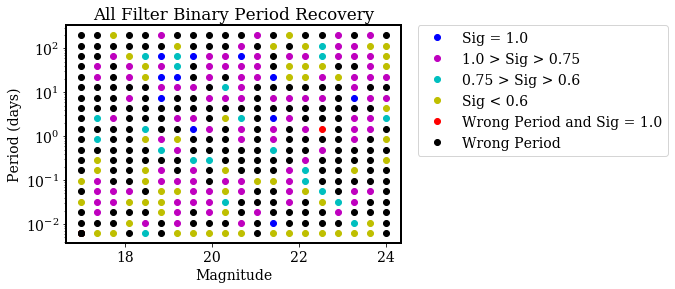

In [37]:
FilterLabel = ['u','g','r','i','z','y']


plt.plot(fullMag[0][0],fullPeriod[0][0],'bo',label='Sig = 1.0')
plt.plot(fullMag[0][0],fullPeriod[0][0],'mo',label='1.0 > Sig > 0.75')
plt.plot(fullMag[0][0],fullPeriod[0][0],'co',label='0.75 > Sig > 0.6')
plt.plot(fullMag[0][0],fullPeriod[0][0],'yo',label='Sig < 0.6')
plt.plot(fullMag[0][0],fullPeriod[0][0],'ro',label='Wrong Period and Sig = 1.0')
plt.plot(fullMag[0][0],fullPeriod[0][0],'ko',label='Wrong Period')
for y in range(20):
    for z in range(20):
        Label = 0

        if fullmeasuredPeriod[y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.1)) and fullmeasuredPeriod[y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.1)):
            if fullSigLevel[y][z] == 1.:
                colour = 'bo'
                plt.plot(fullMag[y][z],fullPeriod[y][z],colour)
            elif fullSigLevel[y][z] < 1. and fullSigLevel[y][z] > 0.75:
                colour = 'mo'
                plt.plot(fullMag[y][z],fullPeriod[y][z],colour)
            elif fullSigLevel[y][z] < 0.75 and fullSigLevel[y][z] > 0.6:
                colour = 'co'
                plt.plot(fullMag[y][z],fullPeriod[y][z],colour)
            elif fullSigLevel[y][z] < 0.6:
                colour = 'yo'
                plt.plot(fullMag[y][z],fullPeriod[y][z],colour)

        else:
            if fullSigLevel[y][z] == 1.:
                plt.plot(fullMag[y][z],fullPeriod[y][z],'ro')
            else: 
                plt.plot(fullMag[y][z],fullPeriod[y][z],'ko')
plt.xlabel('Magnitude')
plt.ylabel('Period (days)')
plt.yscale('log')
plt.title('All Filter Binary Period Recovery')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

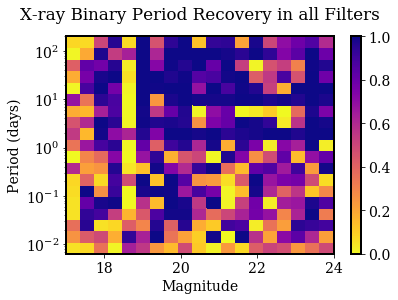

In [38]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('X-ray Binary Period Recovery in all Filters',y=1.05)#,fontweight='semibold')
plt.show()

In [39]:
for y in range(0,len(fullPeriod)):
    for z in range(0, len(fullPeriod[0])):
        if fullmeasuredPeriod[y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and fullmeasuredPeriod[y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
            donothing = 0 
        else: 
            fullSigLevel[y][z] = 0
            print(y,z)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
1 0
1 1
1 3
1 6
1 8
1 10
1 12
1 13
1 14
1 17
1 18
1 19
2 1
2 2
2 5
2 6
2 7
2 8
2 9
2 10
2 12
2 13
2 14
2 15
2 16
2 18
3 0
3 2
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 14
3 17
3 18
3 19
4 2
4 4
4 7
4 8
4 11
4 12
4 13
4 14
4 17
4 18
4 19
5 0
5 1
5 7
5 8
5 10
5 11
5 12
5 17
5 18
5 19
6 6
6 7
6 10
6 12
6 13
6 19
7 1
7 2
7 8
7 9
7 12
7 13
7 15
7 16
7 17
7 18
7 19
8 1
8 5
8 6
8 8
8 9
8 11
8 12
8 14
8 18
8 19
9 1
9 5
9 7
9 8
9 9
9 10
9 12
9 15
9 18
9 19
10 2
10 3
10 6
10 7
10 8
10 12
10 18
10 19
11 0
11 1
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 17
11 18
12 2
12 3
12 4
12 5
12 6
12 7
12 12
12 14
12 16
12 17
12 19
13 1
13 2
13 7
13 8
13 9
13 10
13 12
13 14
13 17
13 18
13 19
14 1
14 2
14 3
14 8
14 9
14 11
14 12
14 14
14 18
14 19
15 1
15 2
15 5
15 6
15 7
15 9
15 10
15 11
15 12
15 14
15 19
16 1
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
16 16
17 2
17 5
17 6
17 7
17 8
1

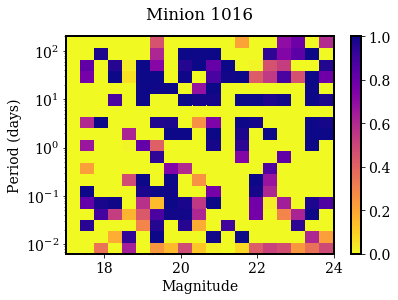

In [40]:
FilterLabel = ['u','g','r','i','z','y']


im = plt.pcolor(fullMag,fullPeriod,fullSigLevel,cmap='plasma_r',vmin=0,vmax=1)
plt.yscale('log')
plt.colorbar(im)
font = {'family' : 'serif',
        'weight' : 'normal',
    'size'   : 14}
plt.rc('font', **font)
plt.rc('axes',linewidth=2)
plt.xlabel('Magnitude')#,fontweight='semibold')
plt.ylabel('Period (days)')#,fontweight='semibold')
plt.title('Minion 1016',y=1.05)#,fontweight='semibold')
plt.savefig('minion1016.png',dpi=500,bbox_inches='tight')
plt.show()

In [41]:
count = 0
othercount = 0
seventeenth = 0
twentyfour = 0
lowPeriod = 0
highPeriod = 0
bigSig = 0
for y in range(0,len(fullPeriod)):
    for z in range(0, len(fullPeriod[0])):
        if fullmeasuredPeriod[y][z] < (fullPeriod[y][z]+(fullPeriod[y][z]*0.05)) and fullmeasuredPeriod[y][z] > (fullPeriod[y][z]-(fullPeriod[y][z]*0.05)):
            donothing = 0
            othercount += 1
            if y == 0:
                seventeenth += 1
            if y == (len(fullPeriod)-1):
                twentyfour += 1
            if z == 0:
                lowPeriod += 1
            if z == len(fullPeriod[0]) - 1:
                highPeriod += 1
            if fullSigLevel[y][z] == 1.0:
                bigSig += 1
        else: 
            fullSigLevel[y][z] = 0
            count += 1
            
print('lowPeriod',lowPeriod/20.)
print('highPeriod',highPeriod/20.)
print('seventeenth',seventeenth/20.)
print('twentyfour',twentyfour/20.)
print('bigSig',bigSig/400.)
print('tot',othercount/400.)

lowPeriod 0.7
highPeriod 0.2
seventeenth 0.0
twentyfour 0.4
bigSig 0.0225
tot 0.4275


In [42]:
print(fullSigLevel)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.9557, 0, 0.8145, 0.9997, 0, 0.21919999999999995, 0, 0.6706, 0, 0.6019, 0, 0, 0, 0.7661, 0.8233, 0, 0, 0], [0.3517, 0, 0, 0.892, 0.9821, 0, 0, 0, 0, 0, 0, 0.9981, 0, 0, 0, 0, 0, 0.9764, 0, 0.4838], [0, 0.18000000000000005, 0, 0.53, 0.9959, 0, 0, 0, 0, 0, 0, 0, 0, 0.8803, 0, 0.9999, 0.9605, 0, 0, 0], [0.6403, 0.9368, 0, 0.16749999999999998, 0, 0.00039999999999995595, 0.48219999999999996, 0, 0, 0.00880000000000003, 0.6173, 0, 0, 0, 0, 0.056499999999999995, 0.027800000000000047, 0, 0, 0], [0, 0, 0.2935, 0.4406, 0.5765, 0.9805, 0.9999, 0, 0, 0.8174, 0, 0, 0, 1.0, 0.9999, 1.0, 0.9976, 0, 0, 0], [0.24550000000000005, 0.9968, 0.9629, 0.8741, 0.14570000000000005, 0.9999, 0, 0, 0.9390000000000001, 0.4145, 0, 0.9699, 0, 0, 0.9945, 1.0, 0.7293000000000001, 0.6134, 0.4596, 0], [0.1522, 0, 0, 0.9905, 0.9979, 0.9953, 0.9974, 0.7335, 0, 0, 1.0, 0.9768, 0, 0, 0.9993, 0, 0, 0, 0, 0], [0.4877, 0, 0.9605, 0.9898, 0.9823, 0, 0, 0.6004,

In [47]:
def rfromRV(R,V):
    r = (0.34)*(V-R)+0.015 + R
    return r
rM = rfromRV(4.04,4.680)
#rM = rfromRV(2.67,3.59)
print(rM)

def gaussian(average,std,xvalue):
    y = np.exp(-(((xvalue-average)/std)**2))
    return y

def newWeight(noSteps,fullPeriod,rM):
    bayestar = BayestarQuery(max_samples=2)
    ebv=[]
    ebv1d = []
    m = sfdmap.SFDMap('/home/mj1e16/DUST_DIR/sfddata-master/sfd')
    rogrim = 1
    rtgrim = 1.9
    rdgrim = 3.5
    rzgrim = 0.41
    rmgrim = 6.5
    gamma = 1.8
    bulge = 0.66
    disc = 0.33
    distance = np.linspace(0.1,15.1,noSteps)
    magrange = np.linspace(17,24,len(fullPeriod))
    #bayestar = BayestarQuery(max_samples=2)
    
    number = 0
    l = np.linspace(0., 360., 61)
    R = 2.273
    for i,x in enumerate(l):
        ebvPerD = []
        for d,dis in enumerate(distance):
            coords = SkyCoord(x*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
            ebvPerD.append(bayestar(coords, mode='median'))
        string = str(ebvPerD)
        if 'nan' in string:
            if number == 0:
                startNan = i
            ebvPerD = []
            number += 1
            for d,dis in enumerate(distance):
                angle = startNan-(x-startNan)
                coords = SkyCoord(angle*units.deg, 0.*units.deg,distance=(dis*1000)*units.pc, frame='galactic')
                ebvPerD.append(bayestar(coords, mode='median'))
        ebv.append(ebvPerD)

    mag = []
    #test = {}
    for y in range(len(l)):
        magperanlge = []
        for x,item in enumerate(distance): 
            magperanlge.append((5*np.log10((item*(1000/10)))+rM)+((ebv[y][x])*R))
            #test[d] = (5*np.log10((item*(1000/10)))+rM)+((ebv[y]+(item*0.53))*R)
        mag.append(magperanlge)
        
    totmag, totmaglist, brightProfile, brightProfilelist = [],[],[],[]
    xtotal, xlist, ytotal, ylist = [],[],[],[]
    Rd = 3 #kpc
    counter = 0
    othercounter = 0
    for x,angle in enumerate(l):
        for y,item in enumerate(distance):
            xlen = (((item*np.cos(np.deg2rad(l[x])))-8))
            ylen = ((item*np.sin(np.deg2rad(l[x]))))

            if xlen**2+ylen**2 < 15**2:
                xtotal.append(xlen)
                ytotal.append(ylen)
                totmaglist.append(mag[x][y])
                dist = ((xlen**2)+(ylen**2))**0.5
                #brightProfilelist.append(np.exp(-(dist/Rd)))
                brightProfilelist.append((bulge*((dist/rogrim)**gamma)*np.exp(-(dist**2/rtgrim**2)))+(disc*(np.exp((-rmgrim/dist)-(dist/rdgrim)))))
                othercounter += 1
                if mag[x][y] > 24 or mag[x][y] < 17:
                    counter += 1
        xlist.append(xtotal)
        ylist.append(ytotal)
        totmag.append(totmaglist)
        brightProfile.append(brightProfilelist)
    
    ### Cuurently using a uniform distribution of LMXBs, to change to sersic profile, multiple each positions magnitude
    ### by the likelyhood of a lmxb being there. Then normalise by dividing by the total number of positions multiplied by 
    ### their respective proportions. 

    magrange = np.linspace(17,24,len(fullPeriod))
    magbin = [[]]*20
    magrep = []
    magbinNo = [[]]*20
    for x,item in enumerate(magrange):
        magBinTemp = []
        magNoTemp = []
        for z in range(len(l)):
            if x < 19:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a < magrange[x+1]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[x+1]])
                #plt.plot()
            else:
                magBinTemp.extend([a for a in totmag[z] if a >= magrange[x] and a<magrange[19]])
                magNoTemp.extend([i for i,a in enumerate(totmag[z]) if a >= magrange[x] and a<magrange[19]])
        magbin[x] = magBinTemp
        magbinNo[x] = magNoTemp

    length = 0
    value = 0
    for x in range(len(brightProfile)):
        length += len(brightProfile[x])
        value += sum (brightProfile[x])
    magrepstep = []
    for x in range(len(magbin)):
        for y in range(len(magbin[x])):
            magrepstep.append((brightProfile[x][magbinNo[x][y]]*(1/value)))
            #print(len(magrepstep))
        magrep.append(sum(magrepstep))
        #print(magrep[x])

    magProp = [float(a)/len(magrep) for a in magrep]    

    
    def gaussian(average,std,xvalue):
        y = np.exp(-(((xvalue-average)/std)**2))
        return y

    mean = 2.3774375000000001
    std = 5.8535886356015618
    gauss = []
    
    for T in range(len(fullPeriod[0])):    
        gauss.append(gaussian(mean,std,fullPeriod[0][T]))

    normalised = [x/sum(gauss) for x in gauss]
    weight = []
    for x in range(len(fullPeriod)):
        for y in range(len(fullPeriod[x])):
            weight.append(fullSigLevel[x][y]*normalised[y]*magProp[x])#*brightProfile[x][y])
            #print(fullSigLevel[x][y],normalised[y],magProp[x],brightProfile[x][y])
    return sum(weight)

4.2726


In [48]:
newWeight(61,fullPeriod,rM)

0.11181976400915014